#  DATA SCIENCE JOBS
## THE BRIDGE (DS-Bootcamp - Proyecto Individual Agosto 2020)

________________
### Análisis de datos asociados a la oferta de empleo en Data Science

Fuente de datos (Data Set)  https://www.kaggle.com/andresionek/data-jobs-listings-glassdoor

Elaborado por : 

- ** Mónica Villasuso López  **  
villasuso.monica@gmail.com  
git @MVillasuso
_________________

## HIPÓTESIS
"Al menos la mitad, (50%), de la oferta laboral en el área de ** Ciencia de Datos, ** corresponde a los perfiles de Análisis (Datos y Negocio)"

## 1. Librerías requeridas para el análisis (* Import *)
_________

In [1]:
import sys 
sys.path.append('../src/utils') 
import pandas as pd 
import numpy as np
from datetime import datetime
import folders_tb as ftb
import visualization_tb as vtb
import mining_data_tb as mtb

import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Carga de datos inicial, de la fuente, en el dataframe        

____________

### Información global de Glassdoor.com   (segundo portal más importante de búsqueda de empleo en el mundo)
** Actualizado a Dic 2019 **  
Dataset con búsquedas para los siguientes perfiles

* data-scientist		**
* software-engineer
* data-analyst			**
* research-scientist
* business-analyst		**
* product-manager
* project-manager
* data-engineer		**
* statistician
* dba
* database-engineer
* machine-learning-engineer

https://www.kaggle.com/andresionek/data-jobs-listings-glassdoor

Información de continentes y códigos de países
https://datahub.io/JohnSnowLabs/country-and-continent-codes-list#data
Continent_Name.csv

In [2]:
GlassD_df= pd.read_csv("glassdoor.csv", sep=",")
cnames_df = pd.read_csv("country_names_2_digit_codes.csv", sep =",")
cont_names_df = pd.read_csv("Continent_Name.csv", sep =",")

_____________
### Información de Glassdoor en USA.   
** Actualizado a Julio 2020 **  
Cada dataset incluye las búsquedas para un determinado perfil, a saber: Data Analyst, Business Analyst, Data Engineer y Data Scientist
- https://www.kaggle.com/andrewmvd/data-scientist-jobs
- https://www.kaggle.com/andrewmvd/data-analyst-jobs
- https://www.kaggle.com/andrewmvd/data-engineer-jobs
- https://www.kaggle.com/andrewmvd/business-analyst-jobs

## Otras referencias consultadas
https://www.simplilearn.com/business-analyst-vs-data-analyst-article
https://blog.udacity.com/2014/11/data-science-job-skills.html

## 3. Preparación de los datos - Data wrangling and Data cleaning
________________
Exploración de los datos del dataframe

### df_GlassD
Dataframe original con la información obtenida de la carga del Data Set

In [3]:
GlassD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165290 entries, 0 to 165289
Columns: 163 entries, benefits.benefitRatingDecimal to wwfu
dtypes: bool(11), float64(35), int64(23), object(94)
memory usage: 193.4+ MB


### df_jobs
Creación de un subconjunto del Dataset original para lo cual es necesario:   
- Eliminar las columnas con información no relevante para el análisis  
- Transformar los tipos de datos útiles para el análisis  
- Estandarizar los códigos de países para poder utilizarlos posteriormente
- Eliminar los registros duplicados


In [4]:

GDjobs_df = mtb.elim_cols(GlassD_df)
GDjobs_df = mtb.transf_cols(GDjobs_df)


*** NOTA: De las 163 columnas originales quedaron  19. ***

In [5]:
GDjobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110822 entries, 0 to 165289
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   empSize      98670 non-null   object        
 1   easyApply    110822 non-null  bool          
 2   empName      108660 non-null  object        
 3   jobTitle     110822 non-null  object        
 4   jobDate      110822 non-null  datetime64[ns]
 5   salHigh      2438 non-null    float64       
 6   salLow       2438 non-null    float64       
 7   jobDesc      110819 non-null  object        
 8   jobSource    110822 non-null  object        
 9   country      77354 non-null   object        
 10  lat          110822 non-null  float64       
 11  long         110822 non-null  float64       
 12  location     110819 non-null  object        
 13  foundedYear  110822 non-null  int64         
 14  industry     78957 non-null   object        
 15  revenue      98670 non-null   obje

In [6]:
GDjobs_df.describe(include="all")

empSize easyApply empName         jobTitle              jobDate  \
count      98670    110822  108660           110822               110822   
unique         8         2   31114            64844                  248   
top     10000--1     False  Amazon  Project Manager  2019-11-01 00:00:00   
freq       32799     98966    1683             3161                 9484   
first        NaN       NaN     NaN              NaN  2017-01-21 00:00:00   
last         NaN       NaN     NaN              NaN  2019-11-10 00:00:00   
mean         NaN       NaN     NaN              NaN                  NaN   
std          NaN       NaN     NaN              NaN                  NaN   
min          NaN       NaN     NaN              NaN                  NaN   
25%          NaN       NaN     NaN              NaN                  NaN   
50%          NaN       NaN     NaN              NaN                  NaN   
75%          NaN       NaN     NaN              NaN                  NaN   
max          NaN       NaN     NaN              NaN                  NaN   

              salHigh         salLow  \
count     2438.000000    2438.000000   
unique            NaN            NaN   
top               NaN            NaN   
freq              NaN            NaN   
first             NaN            NaN   
last              NaN            NaN   
mean    115321.336751   77344.035275   
std      42232.459889   30614.990457   
min         13.000000      10.000000   
25%      85000.000000   55264.500000   
50%     108843.500000   71553.000000   
75%     139455.000000   94978.500000   
max     376948.000000  236650.000000   

                                                  jobDesc  \
count                                              110819   
unique                                             107692   
top     Credit Suisse Careers Credit Suisse Menu Job S...   
freq                                                   24   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                       jobSource country            lat           long  \
count                     110822   77354  110822.000000  110822.000000   
unique                       217     503            NaN            NaN   
top     Indeed XML Feed Employer      BE            NaN            NaN   
freq                       35663    3057            NaN            NaN   
first                        NaN     NaN            NaN            NaN   
last                         NaN     NaN            NaN            NaN   
mean                         NaN     NaN      26.535580      29.663674   
std                          NaN     NaN      25.972731      62.602891   
min                          NaN     NaN     -77.850000    -171.983300   
25%                          NaN     NaN       3.000000       0.000000   
50%                          NaN     NaN      33.871900      12.044750   
75%                          NaN     NaN      48.866700      77.587300   
max                          NaN     NaN      67.183300     177.366700   

         location    foundedYear                      industry  \
count      110819  110822.000000                         78957   
unique       7074            NaN                           137   
top     Singapore            NaN  Computer Hardware & Software   
freq         3436            NaN                          9430   
first         NaN            NaN                           NaN   
last          NaN            NaN                           NaN   
mean          NaN    1272.696

Estandarización de la información correspondiente al país

In [7]:
GDjobs_df = mtb.norm_country(GDjobs_df, cnames_df)
GDjobs_df = mtb.ubicar_loc(GDjobs_df)

** NOTA: Se agregaron las  columnas ccode y cname con la información estandarizada del país  (código y nombre) **

Asignar  experiencia requerida , nivel del puesto y tipo de trabajo según la información contenida en el campo JobTitle

In [8]:
GDjobs_df = mtb.experience (GDjobs_df)
GDjobs_df = mtb.level (GDjobs_df)
GDjobs_df = mtb.jobType(GDjobs_df)

Completar con el valor NA (Not available) los campos en los que la información no exista (valores Nan,None, nulls)

In [9]:
GDjobs_df = mtb.llenar_na(GDjobs_df)

** RESULTADO DATA WRANGLING:   
- De las 165290 filas del  DF original se eliminaron (por inconsistencias) alrededor del 35%, quedando 104486 registros 
- Se agregaron 6 columnas con información estandarizada y que facilita la interpretación
- Se redujo la memoria utilizada por el dataset  en más de 90%% (De 193 MB a 19 MB)

In [10]:
GDjobs_df.shape

(104486, 25)

In [11]:
GDjobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104486 entries, 0 to 110818
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   empSize      104486 non-null  object        
 1   easyApply    104486 non-null  bool          
 2   empName      104486 non-null  object        
 3   jobTitle     104486 non-null  object        
 4   jobDate      104486 non-null  datetime64[ns]
 5   salHigh      2424 non-null    float64       
 6   salLow       2424 non-null    float64       
 7   jobDesc      104486 non-null  object        
 8   jobSource    104486 non-null  object        
 9   country      104486 non-null  object        
 10  lat          104486 non-null  float64       
 11  long         104486 non-null  float64       
 12  location     104486 non-null  object        
 13  foundedYear  104486 non-null  int64         
 14  industry     104486 non-null  object        
 15  revenue      104486 non-null  obje

### res_df
Creación de  un DF resumen (agrupado por los principales campos) para comenzar el análisis de tendencias los datos

In [12]:
res_df = mtb.resumen_df(GDjobs_df)

In [13]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45860 entries, 0 to 45859
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   size          45860 non-null  int64  
 1   empSize       45860 non-null  object 
 2   sector        45860 non-null  object 
 3   industry      45860 non-null  object 
 4   type          45860 non-null  object 
 5   ccode         45860 non-null  object 
 6   cname         45860 non-null  object 
 7   exp           45860 non-null  object 
 8   level         45860 non-null  object 
 9   jobType       45860 non-null  object 
 10  total         45860 non-null  int64  
 11  salLow_min    1518 non-null   float64
 12  salLow_max    1518 non-null   float64
 13  salLow_mean   1518 non-null   float64
 14  salHigh_min   1518 non-null   float64
 15  salHigh_max   1518 non-null   float64
 16  salHigh_mean  1518 non-null   float64
 17  sal_mean      45860 non-null  float64
dtypes: float64(7), int64(2), o

In [14]:
res_df.describe(include="all")

size   empSize                  sector industry  \
count   45860.000000     45860                   45860    45860   
unique           NaN         8                      26      138   
top              NaN  10000--1  Information Technology      N/A   
freq             NaN     12798                   11308     7700   
mean        4.759333       NaN                     NaN      NaN   
std         2.249533       NaN                     NaN      NaN   
min         1.000000       NaN                     NaN      NaN   
25%         3.000000       NaN                     NaN      NaN   
50%         5.000000       NaN                     NaN      NaN   
75%         7.000000       NaN                     NaN      NaN   
max         8.000000       NaN                     NaN      NaN   

                     type  ccode    cname    exp    level jobType  \
count               45860  45860    45860  45860    45860   45860   
unique                 15    176      176      4       13       7   
top     Company - Private     DE  Germany    N/A  Manager   Other   
freq                21920   2320     2320  33757    12794   29225   
mean                  NaN    NaN      NaN    NaN      NaN     NaN   
std                   NaN    NaN      NaN    NaN      NaN     NaN   
min                   NaN    NaN      NaN    NaN      NaN     NaN   
25%                   NaN    NaN      NaN    NaN      NaN     NaN   
50%                   NaN    NaN      NaN    NaN      NaN     NaN   
75%                   NaN    NaN      NaN    NaN      NaN     NaN   
max                   NaN    NaN      NaN    NaN      NaN     NaN   

               total     salLow_min    salLow_max    salLow_mean  \
count   45860.000000    1518.000000    1518.00000    1518.000000   
unique           NaN            NaN           NaN            NaN   
top              NaN            NaN           NaN            NaN   
freq             NaN            NaN           NaN            NaN   
mean        2.278369   72588.517787   79503.86166   75923.710926   
std         4.661901   30010.940397   32665.31079   29918.908338   
min         1.000000      10.000000      10.00000      10.000000   
25%         1.000000   51749.250000   55350.50000   53987.750000   
50%         1.000000   66335.000000   73248.00000   70159.500000   
75%         2.000000   89177.250000   98009.75000   93019.250000   
max       171.000000  236650.000000  236650.00000  236650.000000   

          salHigh_min    salHigh_max   salHigh_mean       sal_mean  
count     1518.000000    1518.000000    1518.000000   45860.000000  
unique            NaN            NaN            NaN            NaN  
top               NaN            NaN            NaN            NaN  
freq              NaN            NaN            NaN            NaN  
mean    108126.714097  117911.237154  112855.626392    2889.693859  
std      40741.883160   44746.302312   40647.784372   17081.481245  
min         13.000000      14.000000      14.000000       0.000000  
25%      79318.500000   85377.250000   83203.500000       0.000000  
50%     100636.500000  110579.500000  106654.333333       0.000000  
75%     130369.250000  142501.250000  136131.500000       0.000000  
max     376376.000000  376948.000000  376376.000000  306513.000000

In [15]:
cjob_df = pd.DataFrame({'jobClas': ['Other', 'Project Mgmt.', 'Data Science','Data Science','Data Science','Data Science','Data Science'] , 
                    "jobType": ['Other', 'Project Manager', 'Business Analyst', 'Data Scientist','Data Analyst','Data Engineer', 'ML/AI']})

In [16]:
cjob_df

jobClas           jobType
0          Other             Other
1  Project Mgmt.   Project Manager
2   Data Science  Business Analyst
3   Data Science    Data Scientist
4   Data Science      Data Analyst
5   Data Science     Data Engineer
6   Data Science             ML/AI

In [17]:
res_df.jobType.value_counts()

Other               29225
Project Manager      4351
Business Analyst     3968
Data Scientist       2792
Data Analyst         2479
Data Engineer        2072
ML/AI                 973
Name: jobType, dtype: int64

In [18]:
res_df=pd.merge(res_df,cjob_df,on="jobType", how='left')

In [19]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45860 entries, 0 to 45859
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   size          45860 non-null  int64  
 1   empSize       45860 non-null  object 
 2   sector        45860 non-null  object 
 3   industry      45860 non-null  object 
 4   type          45860 non-null  object 
 5   ccode         45860 non-null  object 
 6   cname         45860 non-null  object 
 7   exp           45860 non-null  object 
 8   level         45860 non-null  object 
 9   jobType       45860 non-null  object 
 10  total         45860 non-null  int64  
 11  salLow_min    1518 non-null   float64
 12  salLow_max    1518 non-null   float64
 13  salLow_mean   1518 non-null   float64
 14  salHigh_min   1518 non-null   float64
 15  salHigh_max   1518 non-null   float64
 16  salHigh_mean  1518 non-null   float64
 17  sal_mean      45860 non-null  float64
 18  jobClas       45860 non-nu

In [20]:
res_df.shape

(45860, 19)

### DS_df
Creación de  un DF resumen de los trabajos asociados a ciencia de datos  (agrupado por los principales campos) para comenzar el análisis de tendencias los datos

In [21]:
DS_df = res_df[res_df.jobClas == "Data Science"]

In [22]:
DS_df.shape

(12284, 19)

## 4. Análisis de tendencias en los datos (EDA)
________________

### Estandarización paleta de colores 

In [149]:
color_jTpie = { 'Data Analyst': 'lightyellow','Business Analyst': 'lightgreen', 'Data Engineer': 'lightblue', 'Data Scientist': 'pink', 'ML/AI': 'violet','Project Manager': 'grey' , 'Other': 'wheat'}

color_jT = { 'Data Analyst': 'lightyellow','Business Analyst': 'lightgreen', 'Data Engineer': 'lightblue', 'Data Scientist': 'pink', 'ML/AI': 'violet','Project Manager': 'lightgrey' , 'Other': 'linen'}

color_jT2 = { 'Data Analyst': 'yellow','Business Analyst': 'green', 'Data Engineer': 'blue', 'Data Scientist': 'pink', 'ML/AI': 'magenta','Project Manager': 'grey' , 'Other': 'wheat'}

color_exp={'Senior': 'indianred', 'Junior': 'paleturquoise', 'Internship': 'sandybrown', 'N/A': 'thistle'}

color_level = {'Analyst': 'lightblue','Technical': 'lightcoral','Scientist': 'lightyellow','PMO':'lightgreen','Consultant':'lightpink', 'Manager':'lightsalmon',
 'N/A':'lightseagreen','Developer':'lightgoldenrodyellow','Research': 'lightslategray','Product': 'ivory','Dba': 'lavender','Director':'linen','Assistant': 'mistyrose'}

color_sector = {'Business Services': 'lightblue','Information Technology': 'lightyellow','Finance': 'lightgreen','Accounting & Legal':'khaki','N/A':'lightgrey', 'Insurance':'lightsalmon', 'Telecommunications': 'pink', 'Biotech & Pharmaceuticals' : 'plum'}

# Orden de la empresa segun tamano (numero de empleados)
lord= ['1-50', '51-200', '201-500', '501-1000', '1001-5000', '5001-10000','10000--1', 'N/A']

In [24]:
def graf_bar (col, col2, df, numbars, val_excl, lcolors,lorden,xtit,ytit,tit,rol, emp):
    if emp:
        top_num = df[(df.jobType!="Other")& (emp_df.jobType!="Project Manager")].groupby(col).sum().sort_values("total", ascending = False).total.nlargest(numbars).index.to_list()
    else:
        top_num = df[col].value_counts().head(numbars).index.to_list()

    bar_df = df[(df[col]!=val_excl) & (df[col].isin(top_num)) ].groupby([col,col2]).total.sum().to_frame()
    bar_df.reset_index(inplace=True)
 
    fig=px.bar(bar_df, x=col, y = "total", color = col2, color_discrete_map = lcolors, width=900, height=600)
    
    if lorden:
        xaxisval={'categoryorder':'array', 'categoryarray':lorden} 
    else:
        xaxisval={'categoryorder':'total descending'} 

    fig.update_layout(  
        barmode='stack', xaxis = xaxisval,   
        title = {"text" : tit, "x":0.4, "xanchor":"center"},             
        xaxis_title = xtit,
        yaxis_title = ytit,
        legend=dict(title= rol, y=0.5, font_size=8))
    fig.show()
    

In [26]:
def graf_pie (df, val, col,tit,lcolor):
    fig = px.pie(df, values=val, names=col, title=tit, color = col, color_discrete_map = lcolor)
    fig.show()

In [27]:
def graf_sbpie (df,lpath,val,col,lcolor,tit, det):
    if det : 
        fig = px.sunburst(df, path=lpath, values=val, color = col, color_discrete_map=lcolor, title=tit)
    else:
        fig = px.sunburst(df, path=lpath, color = col, title=tit)
    fig.show()

### PIE CHARTS

In [28]:
graf_pie(df=res_df,val="total",col='jobType', tit= "OFERTA DE EMPLEO - DATA SCIENCE - POR ROL", lcolor= color_jTpie )


De la totalidad de oferta de empleos técnicos ,  
*** 21% corresponde a trabajos relacionados con Datos   ***   
9% a Gerencia de Proyectos  
70% a otros trabajs técnicos (tal como Desarrollo de Sofware/aplicaciones, Soporte Técnico, Gerencia de Operaciones, Calidad , Ingenieros de software, Científicos o Investigadores)
  
  ... analicemos en detalle este 21%

In [29]:
graf_sbpie (df=res_df,lpath= ['jobClas', 'jobType'],val = (res_df['total']/res_df['total'].sum())*100 ,col = "jobType",lcolor = color_jTpie,tit= "OFERTA DE EMPLEO - DATA SCIENCE - POR ROL (%)", det=True)

graf_sbpie (df=res_df,lpath= ['jobClas', 'jobType'],val = res_df['total'] ,col = "jobType",lcolor = color_jTpie,tit= "OFERTA DE EMPLEO - DATA SCIENCE - POR ROL (total)", det = True)


Vemos que dentro del 21% que representa la oferta de  Data Science más de la mitad (55%), corresponden a perfiles  de Análisis de Datos y Análisis de Negocios (un 11,5% del total de la oferta analizada)

## * * * NOTA: AGREGAR GRAFICO DE BARRAS CON LOS VALORES y PORCENTAJES de DATA SCIENCE

In [30]:

graf_bar('industry', "jobType", DS_df,16,"N/A", color_jT,[], 'Industria', 'Total', 'OFERTA DATA SCIENCE POR INDUSTRIA', 'ROL', False )


In [31]:
graf_bar('sector', "jobType", DS_df,16,"N/A", color_jT,[],'Sector', 'Total', 'OFERTA DATA SCIENCE POR SECTOR', 'ROL', False)

In [32]:
graf_bar('type', "jobType", DS_df,16,"N/A", color_jT,[],'Tipo de Empresa', 'Total', 'OFERTA DATA SCIENCE POR TIPO DE EMPRESA', 'ROL', False)

In [33]:
# Creaciónn de un  DF con la información resumida por empresa (para conocer los nombres de las empresas que más oferta hacen en el área de DS)]
emp_df = mtb.res_emp_df(GDjobs_df)
  


In [34]:
graf_bar('empName', "jobType", emp_df ,40,"Other", color_jT,[],'', 'Total', 'TOP 40  -  EMPRESAS CON MAYOR OFERTA EN DATA SCIENCE', 'ROL', True)

In [150]:
graf_bar('empName', "sector", emp_df[(emp_df['jobType'] !="Other") & (emp_df['jobType'] !="Project Manager")] ,40,"N/A", color_sector,[],'', 'Total', 'TOP 40  -  EMPRESAS CON OFERTA EN DATA SCIENCE POR SECTOR', 'SECTOR',True)

In [37]:
graf_bar('jobType', "exp", DS_df,16,"N/A", color_exp,[],'Rol', 'Total', 'OFERTA DATA SCIENCE POR ROL y EXPERIENCIA', 'EXPERIENCIA', False)

In [38]:
# Nivel del perfil  (segun Job Description)  por tipo de trabajo
graf_bar('jobType', "level", DS_df,16,"N/A", color_level,[],'Rol', 'Total', 'OFERTA DATA SCIENCE POR ROL y NIVEL DEL PERFIL', 'NIVEL', False)

In [39]:
graf_bar('exp', "jobType", DS_df,16,"N/A", color_jT,[],'Experiencia', 'Total', 'OFERTA DATA SCIENCE POR EXPERIENCIA', 'ROL', False)

In [40]:


graf_bar('empSize', "jobType", DS_df,16,"N/A", color_jT,lord, 'Nro de empleados', 'Total', 'OFERTA DATA SCIENCE POR TAMAÑO DE EMPRESA', 'ROL', False)

In [41]:
# Dataframe con Tipos de trabajo como PM o DS, salarios >0 y empresas bien identificadas (tamabo y antiguedad)
s_df = GDjobs_df[(GDjobs_df.jobType!="Other")&(GDjobs_df.sal>0) &(GDjobs_df.foundedYear >0) & (GDjobs_df["size"]<8) ]


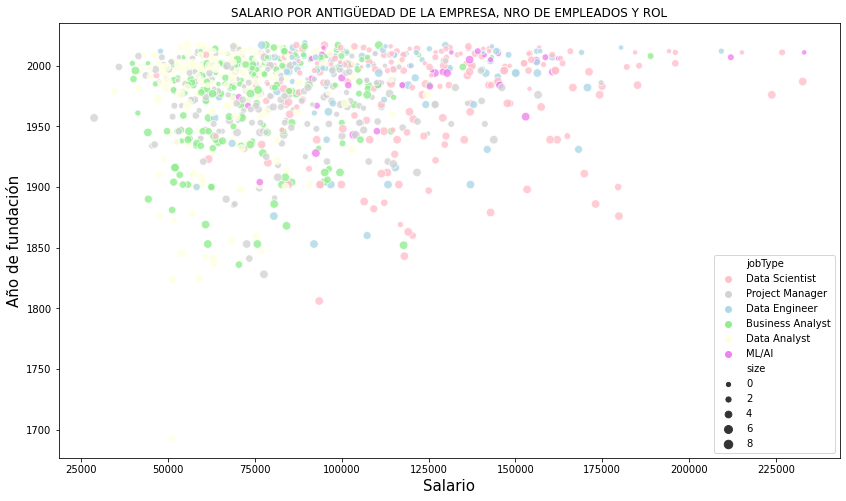

In [42]:

plt.subplots(figsize=(14, 8))
sns.scatterplot(x="sal", y='foundedYear', hue="jobType", alpha=.8, data=s_df, size = "size"
,palette = color_jT)
plt.ylabel("Año de fundación", fontsize= 15)
plt.xlabel("Salario", fontsize= 15)
plt.title ("SALARIO POR ANTIGÜEDAD DE LA EMPRESA, NRO DE EMPLEADOS Y ROL")
plt.show()

In [95]:
#Salario por tipo de trabajo y antiguedad y tamano de la empresa

fig = px.scatter(s_df, x="sal", y="foundedYear", color= "jobType", color_discrete_map = color_jT,
                 size=s_df['size'], hover_data=['jobType'], width =1000, height = 600)
fig.update_layout(     
            title = {"text" : "SALARIO POR ANTIGÜEDAD DE EMPRESA , TAMAÑO (Nro. empleados) Y ROL", "x":0.4, "xanchor":"center"}, 
            xaxis_title = "Salario",
            yaxis_title = "Año de Fundación",
            plot_bgcolor = "darkgrey",
            legend=dict(title= " ", y=0.5, font_size=12))
fig.show()

In [97]:
#Salario por antiguedad y tamano de la empresa (muestra el nombre de la empresa)
import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergl(
    x = s_df["sal"],
    y = s_df['foundedYear'],
    text = s_df["empName"],
    mode='markers',
    marker=dict(
        size =s_df["size"]*2, 
        color=s_df["size"],
        colorscale='GnBu_r',
        line_width=1,
        showscale=True
    )
))
fig.update_layout(
    title='Salario medio por antigüedad de la empresa y número de empleados',
    showlegend =False, 
    autosize=False,
    width=900,
    plot_bgcolor = "darkgrey",
    height=600)

fig.show()

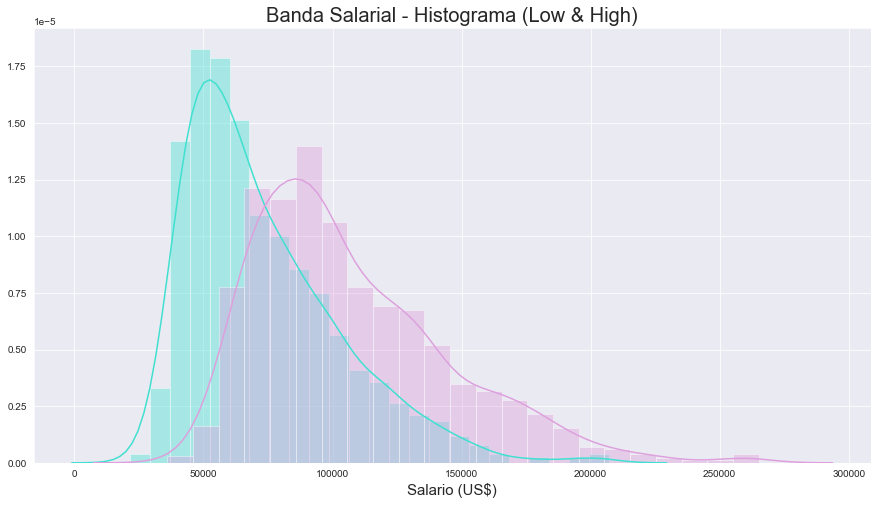

In [155]:
plt.figure(figsize=(15,8))
sns.set_style ('darkgrid')
sns.distplot(s_df["salLow"], color = 'turquoise')
sns.distplot(s_df["salHigh"], color = 'plum')
plt.title('Banda Salarial - Histograma (Low & High)', fontsize = 20)
plt.xlabel('Salario (US$)', fontsize = 15)
plt.show()


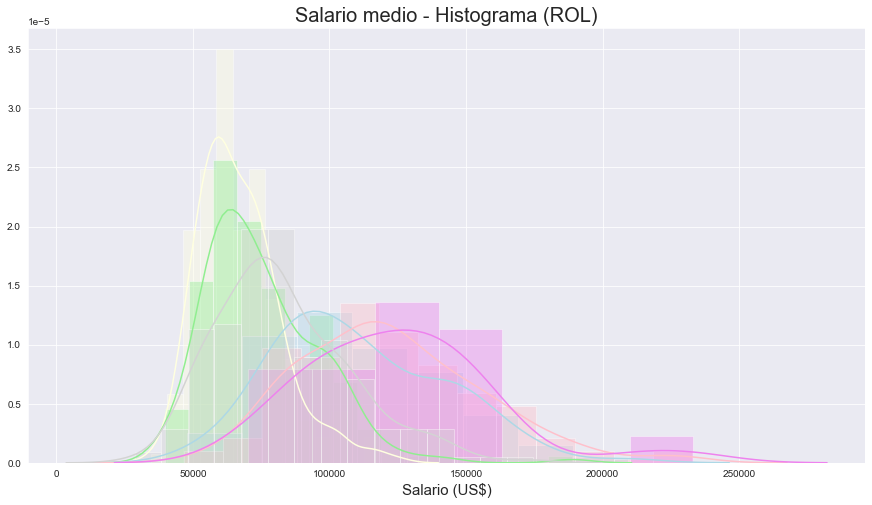

In [46]:
# Histgogramas de salario por tipo de trabajo 
plt.figure(figsize=(15,8))
for clave, valor in color_jT.items(): 
    sns.distplot(s_df[(s_df.jobType==clave)]["sal"], color = valor)#, bins=5)

plt.title('Salario medio - Histograma (ROL)', fontsize = 20)
plt.xlabel('Salario (US$)', fontsize = 15)
plt.show()

In [98]:
# BOX PLOT SALARIO  POR TIPO
x_data = []
y_data=[]
lcolors=[]


for clave, valor in color_jT.items(): 
    x_data.append(clave)
    y_data.append(s_df[s_df.jobType==clave]['sal'])
    lcolors.append (valor)

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, lcolors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )
fig.update_layout(
    title='Box Plot - Salario (US$) por ROL (Data Science & Project Management)',
    showlegend =False, 
    autosize=False,
    width=900,
    height=600)
fig.show()



In [48]:
# Ver quienes son los outliers (en términos de salario). Se incorporan en un dataframe
outl_df = s_df[
    ((s_df['jobType']=="Data Analyst")& (s_df["sal"]>103441) ) |
    ((s_df['jobType']=="Business Analyst")& (s_df["sal"]>125224) ) | 
    ((s_df['jobType']=="Data Engineer")& (s_df["sal"]>209267) ) |
    ((s_df['jobType']=="Data Scientist")& (s_df["sal"]>196020) ) | 
    ((s_df['jobType']=="ML/AI")& (s_df["sal"]>212000) )  |   
    ((s_df['jobType']=="Project Manager")& (s_df["sal"]>143774) )   
]

Son 20 ofertas en total.....  
Veamos de quien se trata 

In [167]:
fig = go.Figure(data=go.Scattergl(
    x = outl_df["sal"],
    y = outl_df['foundedYear'],
    text = outl_df["empName"],
    mode='markers',
    marker=dict(
        size =outl_df["size"]*2, 
        color=outl_df["size"],
        colorscale='GnBu_r',
        line_width=1,
        showscale=True
    )
))

fig.update_layout(
    title='OUTLIERS (Salario) - ANTIGÜEDAD DE LA EMPRESA Y NRO DE EMPLEADOS',
    showlegend =True, 
    legend= dict(title= "Nro-Empleados", y=1.1, font_size=10),
    autosize=False,
    width=900,
    height=600,
    plot_bgcolor = "grey"
)
fig.show()

In [156]:
graf_sbpie (df=outl_df,lpath = ['sector', 'empName'],val="", col="sector",lcolor = color_sector ,tit= "SALARIO (OUTLIERS) POR SECTOR", det = False)

## Como se distribuye la oferta en el mundo?

In [51]:
#Dataframe resumen con la información mundial 
rworld_df = (res_df.groupby(['cname','jobType', 'jobClas'])['total'].sum()).to_frame()

In [52]:

rworld_df.reset_index(inplace=True)

In [53]:
dsub = rworld_df[rworld_df.jobClas=='Data Science']
ub = rworld_df[rworld_df.jobClas=='Data Science']
fig = px.scatter_geo(rworld_df, locations="cname", locationmode="country names" ,color="jobType", hover_name="cname", size=5*rworld_df["total"], projection="natural earth", color_discrete_map = color_jT2, width =1100 , height = 600, title = "OFERTA LABORAL EN DATA SCIENCE POR ROL  - MAPA MUNDIAL" 
 )
fig.show()

### ANALISIS DE CORRELACION

In [54]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45860 entries, 0 to 45859
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   size          45860 non-null  int64  
 1   empSize       45860 non-null  object 
 2   sector        45860 non-null  object 
 3   industry      45860 non-null  object 
 4   type          45860 non-null  object 
 5   ccode         45860 non-null  object 
 6   cname         45860 non-null  object 
 7   exp           45860 non-null  object 
 8   level         45860 non-null  object 
 9   jobType       45860 non-null  object 
 10  total         45860 non-null  int64  
 11  salLow_min    1518 non-null   float64
 12  salLow_max    1518 non-null   float64
 13  salLow_mean   1518 non-null   float64
 14  salHigh_min   1518 non-null   float64
 15  salHigh_max   1518 non-null   float64
 16  salHigh_mean  1518 non-null   float64
 17  sal_mean      45860 non-null  float64
 18  jobClas       45860 non-nu

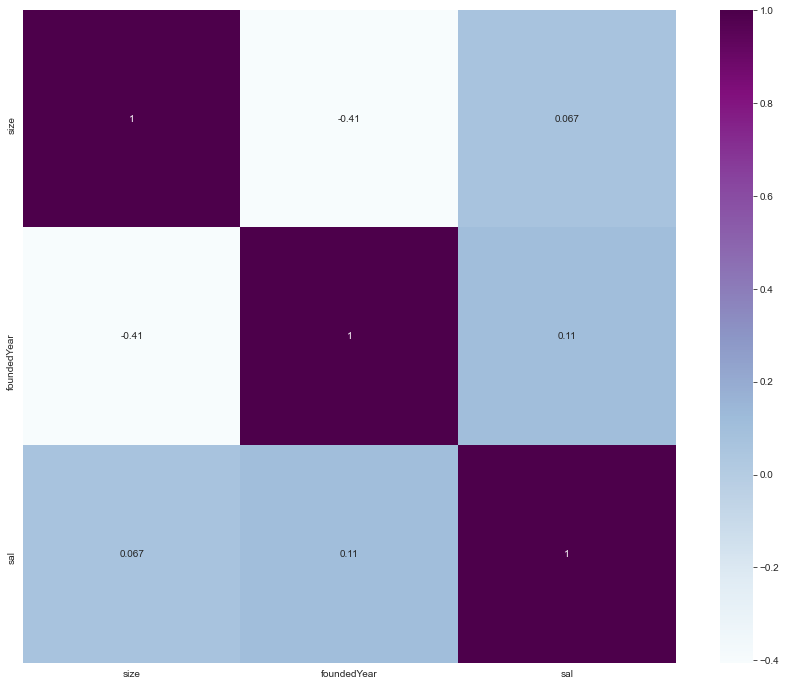

In [55]:
#Correlación entre variables (Salario, Tamaño de empresa y Antiguedad (ano de fundación)]))
plt.subplots(figsize=(16, 12)) 
corr = s_df.loc[:,["size", "foundedYear", "sal"]].corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),  cmap= "BuPu", square=True,  annot=True)

## OTROS PENDIENTES
LLevar todo a libreria
Estandarizar colores
Actualizar Trello
Graficos de Trello


Análisis de Tools  
Análisis por nombre de empresa

Correlacion entre variable


In [56]:

#Revisión de la columna Job Description para ubicar en ella las principales tecnologias requeridas
# BUSINESS INTELLIGENCE TOOLS
# Tableau, MicroStrategy, PowerBI(Microsoft), QLIKSense, Business Objects(SAP), COGNOS(IBM), EXCEL
# DATA ANALYSIS TOOLS (LANGUAGES)
# Python, R, SAS, MATLAB, SQL
# MACHINE LEARNING
# ML (Machine Learning), Time Series, Predic, NLP, SciKit, PyTorch, AML
# GESTION PROYECTOS
# Agile, Scrum, PMO, Microsoft Project, JIRA, TRELLO
# CLOUD
# AWS, AZURE, Google Cloud  (y CLOUD en general)
# BIG DB TOOLS (Open Source)
# SPARK, CASSANDRA, HADOOP, HIVE, MONGO DB
# OTROS 
# PANDAS, API, JSON, CRM
# Aumentar el despliegue del texto en pantalla de las columnas (especialmente para el caso de JobDesc)
#pd.set_option('display.max_colwidth', 2000)


In [57]:
#GDjobs_df[(GDjobs_df["jobDesc"].str.contains("Cloud ML",na=False))].count()
#GDjobs_df[(GDjobs_df["jobTitle"].str.contains("Project Manager",na=False))& (GDjobs_df["jobType"]== "")]

In [58]:
#GDjobs_df["empName"].nunique()      # Hay 30567 empresas en total. Pendiente analizar top empresas y sector en cada perfil